**ASSOCIATION** **RULE** **MINING**(**APRIORI**)-->M&M dataset

In [1]:
# M&M data set
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('Datasets/M&M.NS.csv')

# Convert numeric columns to categorical for discretization
for col in df.columns:
    if col != 'Date':
        df[col] = pd.cut(df[col], bins=3, labels=['Low', 'Medium', 'High'])

# Drop Date column for association rule mining
df = df.drop(columns=['Date'])

# Apply one-hot encoding to convert categorical values to binary values
df_encoded = pd.get_dummies(df)

# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filter rules based on support and lift
filtered_rules = rules[(rules['support'] > 0.1) & (rules['lift'] > 1)]

print(filtered_rules)


             antecedents                                        consequents  \
0             (High_Low)                                         (Open_Low)   
1             (Open_Low)                                         (High_Low)   
2              (Low_Low)                                         (Open_Low)   
3             (Open_Low)                                          (Low_Low)   
4            (Close_Low)                                         (Open_Low)   
...                  ...                                                ...   
1137       (High_Medium)  (Open_Medium, Adj Close_Medium, Close_Medium, ...   
1138       (Open_Medium)  (High_Medium, Adj Close_Medium, Close_Medium, ...   
1139  (Adj Close_Medium)  (High_Medium, Open_Medium, Close_Medium, Volum...   
1140      (Close_Medium)  (High_Medium, Open_Medium, Adj Close_Medium, V...   
1141        (Low_Medium)  (High_Medium, Open_Medium, Adj Close_Medium, C...   

      antecedent support  consequent support   supp

**DIMENSIONALITY REDUCTION (PCA**)-->M&M datset

In [2]:
# M&M data set
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Read the CSV file
df = pd.read_csv('Datasets/M&M.NS.csv')  # Replace 'your_dataset.csv' with the path to your dataset

# Select numerical features for PCA
numerical_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data_subset = df[numerical_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)

# Apply PCA
pca = PCA(n_components=2)  # Specify the number of components (2 for example)
pca_result = pca.fit_transform(scaled_data)

# Create DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Concatenate PCA results with original DataFrame (if needed)
final_df = pd.concat([df, pca_df], axis=1)

#printing the output
print(pca_df)

          PC1       PC2
0   -4.598749  1.186397
1   -4.537507  0.251135
2   -4.381752  0.349780
3   -4.475422  0.067913
4   -4.449669  0.068025
..        ...       ...
240  3.669731 -0.735994
241  3.914117  0.201389
242  3.952015  0.367019
243  3.963943  0.423930
244  4.331532  0.165944

[245 rows x 2 columns]


**DIMENSIONALITY REDUCTION (Feature Selection**)-->M&M datset

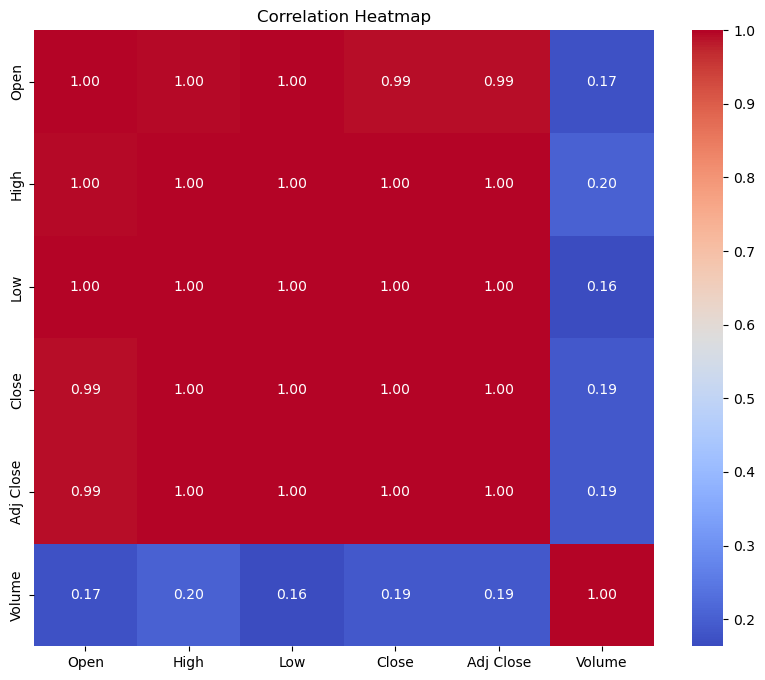

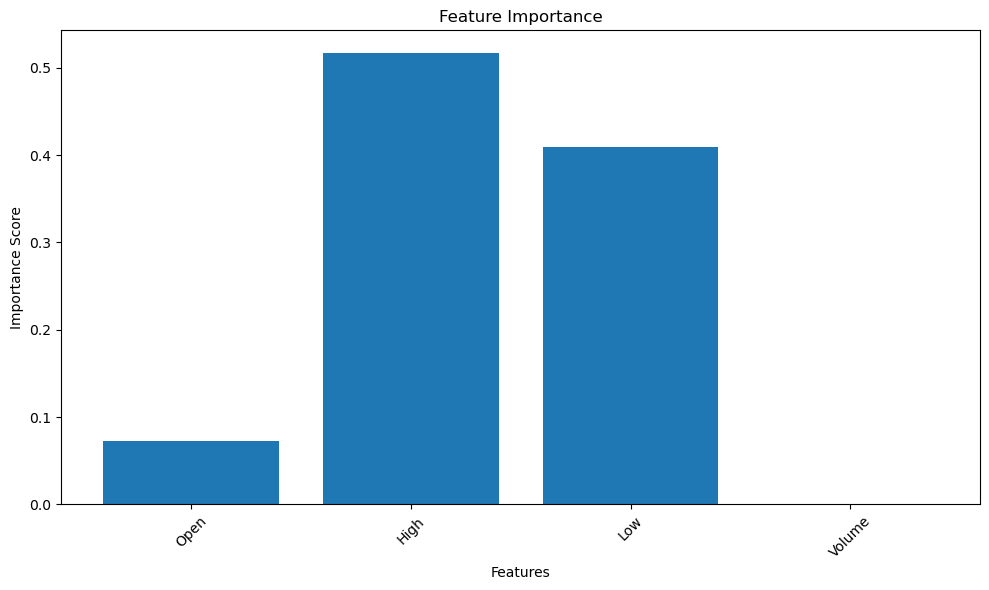

            High          Low
0    1152.449951  1132.000000
1    1163.000000  1145.849976
2    1180.000000  1155.300049
3    1173.300049  1151.949951
4    1175.000000  1148.300049
..           ...          ...
240  1875.000000  1845.000000
241  1905.449951  1847.250000
242  1917.500000  1861.099976
243  1899.900024  1855.300049
244  1962.949951  1870.349976

[245 rows x 2 columns]


In [3]:
# M&M data set
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Read the CSV file
df = pd.read_csv('Datasets/M&M.NS.csv')  # Replace with the path to your dataset

# Ensure that all columns used in corr() are numeric
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Select features and target variable
X = df.drop(columns=['Date', 'Close', 'Adj Close'])  # Drop irrelevant or redundant features
y = df['Close']  # Target variable

# Train Random Forest model to determine feature importance
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Plot feature importance
feature_importance = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()  # Add this line to prevent label overlap
plt.show()

# Select features based on importance score
selected_features = SelectFromModel(rf_model, threshold='median')  # Use median importance score as threshold
selected_features.fit(X, y)
X_selected = selected_features.transform(X)

# Get selected feature names
selected_feature_names = X.columns[selected_features.get_support()]

# Create DataFrame with selected features (if needed)
final_df = pd.DataFrame(data=X_selected, columns=selected_feature_names)
print(final_df)

**ASSOCIATION** **RULE** **MINING**(**APRIORI**)-->SBIN dataset

In [4]:
#SBIN dataset
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('Datasets/SBIN.NS.csv')

# Convert numeric columns to categorical for discretization
for col in df.columns:
    if col != 'Date':
        df[col] = pd.cut(df[col], bins=3, labels=['Low', 'Medium', 'High'])

# Drop Date column for association rule mining
df = df.drop(columns=['Date'])

# Apply one-hot encoding to convert categorical values to binary values
df_encoded = pd.get_dummies(df)

# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filter rules based on support and lift
filtered_rules = rules[(rules['support'] > 0.1) & (rules['lift'] > 1)]

print(filtered_rules)


         antecedents                                        consequents  \
0         (High_Low)                                         (Open_Low)   
1         (Open_Low)                                         (High_Low)   
2          (Low_Low)                                         (Open_Low)   
3         (Open_Low)                                          (Low_Low)   
4        (Close_Low)                                         (Open_Low)   
..               ...                                                ...   
777       (High_Low)  (Low_Low, Close_Low, Adj Close_Low, Open_Low, ...   
778      (Close_Low)  (Low_Low, High_Low, Adj Close_Low, Open_Low, V...   
779  (Adj Close_Low)  (Low_Low, High_Low, Close_Low, Open_Low, Volum...   
780       (Open_Low)  (Low_Low, High_Low, Close_Low, Adj Close_Low, ...   
781     (Volume_Low)  (Low_Low, High_Low, Close_Low, Adj Close_Low, ...   

     antecedent support  consequent support   support  confidence      lift  \
0              0.640

**DIMENSIONALITY REDUCTION (PCA)**-->SBIN datset

In [5]:
#SBIN dataset
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Read the CSV file
df = pd.read_csv('Datasets/SBIN.NS.csv')  # Replace 'your_dataset.csv' with the path to your dataset

# Select numerical features for PCA
numerical_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data_subset = df[numerical_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)

# Apply PCA
pca = PCA(n_components=2)  # Specify the number of components (2 for example)
pca_result = pca.fit_transform(scaled_data)

# Create DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Concatenate PCA results with original DataFrame (if needed)
final_df = pd.concat([df, pca_df], axis=1)

#printing the output
print(pca_df)

          PC1       PC2
0   -3.443367  1.045709
1   -3.183891  0.199427
2   -3.098967 -0.184725
3   -3.170008 -0.254500
4   -2.950227  1.115067
..        ...       ...
240  4.734536 -0.728592
241  4.778954 -0.688845
242  4.643353 -0.779529
243  4.626956  1.072883
244  4.918107  0.047599

[245 rows x 2 columns]


**DIMENSIONALITY REDUCTION (Feature Selection**)-->SBIN datset

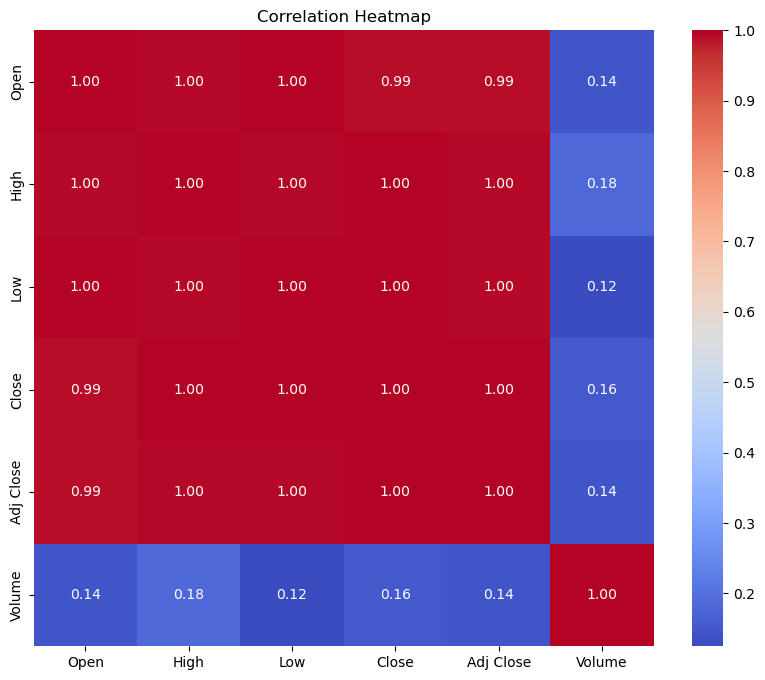

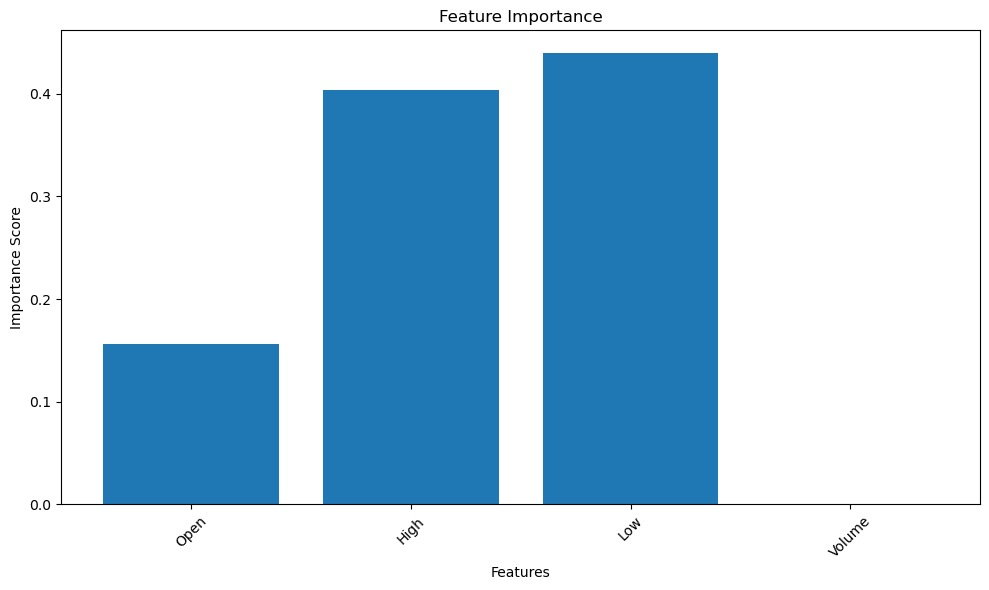

           High         Low
0    518.000000  506.299988
1    524.900024  519.349976
2    528.500000  522.099976
3    527.599976  519.049988
4    533.700012  521.650024
..          ...         ...
240  750.599976  740.549988
241  748.799988  741.400024
242  747.849976  738.500000
243  745.849976  730.200012
244  759.549988  736.900024

[245 rows x 2 columns]


In [6]:
#SBIN dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Read the CSV file
df = pd.read_csv('Datasets/SBIN.NS.csv')  # Replace with the path to your dataset

# Ensure that all columns used in corr() are numeric
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Select features and target variable
X = df.drop(columns=['Date', 'Close', 'Adj Close'])  # Drop irrelevant or redundant features
y = df['Close']  # Target variable

# Train Random Forest model to determine feature importance
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Plot feature importance
feature_importance = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()  # Add this line to prevent label overlap
plt.show()

# Select features based on importance score
selected_features = SelectFromModel(rf_model, threshold='median')  # Use median importance score as threshold
selected_features.fit(X, y)
X_selected = selected_features.transform(X)

# Get selected feature names
selected_feature_names = X.columns[selected_features.get_support()]

# Create DataFrame with selected features (if needed)
final_df = pd.DataFrame(data=X_selected, columns=selected_feature_names)
print(final_df)

**ASSOCIATION** **RULE** **MINING**(**APRIORI**)-->TCS dataset

In [7]:
#TCS dataset
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('Datasets/TCS.NS.csv')

# Convert numeric columns to categorical for discretization
for col in df.columns:
    if col != 'Date':
        df[col] = pd.cut(df[col], bins=3, labels=['Low', 'Medium', 'High'])

# Drop Date column for association rule mining
df = df.drop(columns=['Date'])

# Apply one-hot encoding to convert categorical values to binary values
df_encoded = pd.get_dummies(df)

# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filter rules based on support and lift
filtered_rules = rules[(rules['support'] > 0.1) & (rules['lift'] > 1)]

print(filtered_rules)

             antecedents                                        consequents  \
0             (High_Low)                                         (Open_Low)   
1             (Open_Low)                                         (High_Low)   
2              (Low_Low)                                         (Open_Low)   
3             (Open_Low)                                          (Low_Low)   
4            (Close_Low)                                         (Open_Low)   
...                  ...                                                ...   
1189       (Open_Medium)  (High_Medium, Adj Close_Medium, Close_Medium, ...   
1190  (Adj Close_Medium)  (High_Medium, Open_Medium, Close_Medium, Volum...   
1191      (Close_Medium)  (High_Medium, Open_Medium, Adj Close_Medium, V...   
1192        (Volume_Low)  (High_Medium, Open_Medium, Adj Close_Medium, C...   
1193        (Low_Medium)  (High_Medium, Open_Medium, Adj Close_Medium, C...   

      antecedent support  consequent support   supp

**DIMENSIONALITY REDUCTION (PCA)**-->TCS datset

In [8]:
#TCS dataset
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Read the CSV file
df = pd.read_csv('Datasets/TCS.NS.csv')  # Replace 'your_dataset.csv' with the path to your dataset

# Select numerical features for PCA
numerical_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data_subset = df[numerical_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)

# Apply PCA
pca = PCA(n_components=2)  # Specify the number of components (2 for example)
pca_result = pca.fit_transform(scaled_data)

# Create DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Concatenate PCA results with original DataFrame (if needed)
final_df = pd.concat([df, pca_df], axis=1)

#printing the output
print(pca_df)

          PC1       PC2
0   -3.148061  0.035552
1   -2.629433  0.540020
2   -2.624968 -0.216457
3   -2.382451  0.754493
4   -2.434707 -0.078489
..        ...       ...
240  3.487062  1.117597
241  3.108200  2.931742
242  2.782286  0.859403
243  2.411011 -0.389658
244  2.729739  1.628089

[245 rows x 2 columns]


**DIMENSIONALITY REDUCTION (Feature Selection**)-->TCS datset

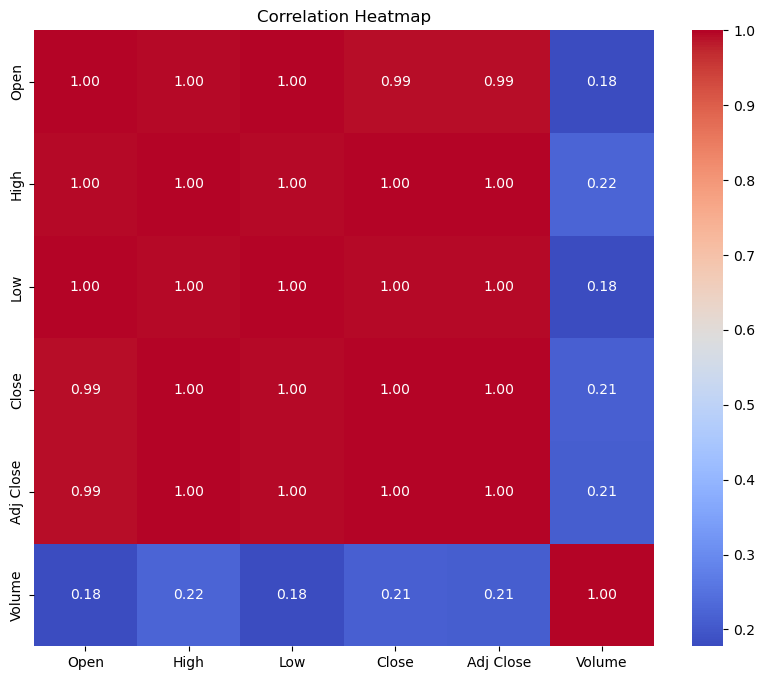

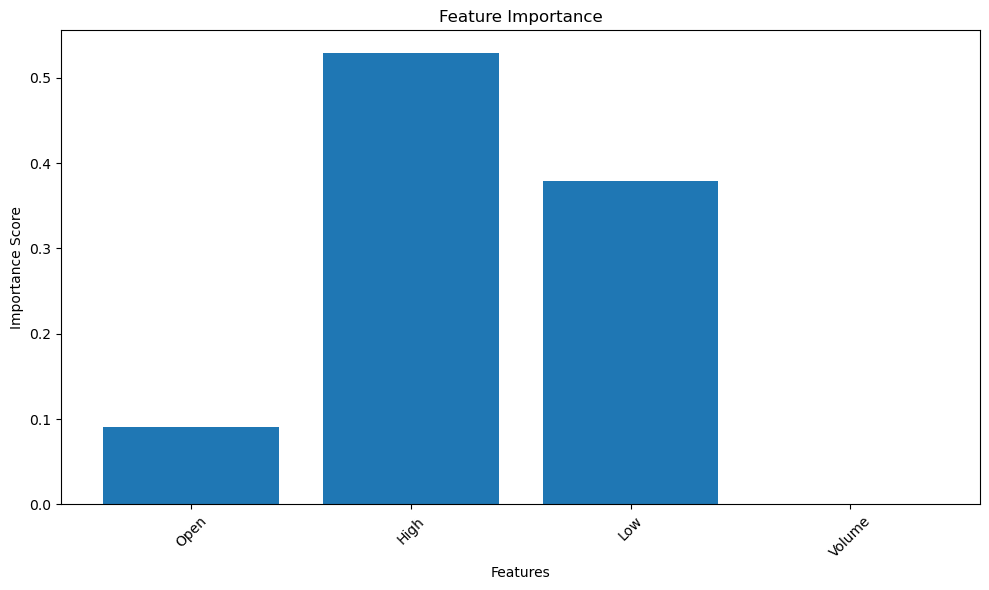

            High          Low
0    3150.000000  3104.100098
1    3213.000000  3152.000000
2    3224.949951  3173.750000
3    3264.350098  3185.500000
4    3257.350098  3215.000000
..           ...          ...
240  4008.399902  3948.000000
241  3938.000000  3855.000000
242  3946.699951  3871.449951
243  3895.000000  3829.399902
244  3915.000000  3840.500000

[245 rows x 2 columns]


In [9]:
#TCS dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Read the CSV file
df = pd.read_csv('Datasets/TCS.NS.csv')  # Replace with the path to your dataset

# Ensure that all columns used in corr() are numeric
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Select features and target variable
X = df.drop(columns=['Date', 'Close', 'Adj Close'])  # Drop irrelevant or redundant features
y = df['Close']  # Target variable

# Train Random Forest model to determine feature importance
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Plot feature importance
feature_importance = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()  # Add this line to prevent label overlap
plt.show()

# Select features based on importance score
selected_features = SelectFromModel(rf_model, threshold='median')  # Use median importance score as threshold
selected_features.fit(X, y)
X_selected = selected_features.transform(X)

# Get selected feature names
selected_feature_names = X.columns[selected_features.get_support()]

# Create DataFrame with selected features (if needed)
final_df = pd.DataFrame(data=X_selected, columns=selected_feature_names)
print(final_df)

**ASSOCIATION** **RULE** **MINING**(**APRIORI**)-->ZOMATO dataset

In [10]:
#Zomato dataset
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('Datasets/ZOMATO.NS.csv')

# Convert numeric columns to categorical for discretization
for col in df.columns:
    if col != 'Date':
        df[col] = pd.cut(df[col], bins=3, labels=['Low', 'Medium', 'High'])

# Drop Date column for association rule mining
df = df.drop(columns=['Date'])

# Apply one-hot encoding to convert categorical values to binary values
df_encoded = pd.get_dummies(df)

# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filter rules based on support and lift
filtered_rules = rules[(rules['support'] > 0.1) & (rules['lift'] > 1)]

print(filtered_rules)

             antecedents                                        consequents  \
0             (High_Low)                                         (Open_Low)   
1             (Open_Low)                                         (High_Low)   
2              (Low_Low)                                         (Open_Low)   
3             (Open_Low)                                          (Low_Low)   
4            (Close_Low)                                         (Open_Low)   
...                  ...                                                ...   
1189       (Open_Medium)  (High_Medium, Adj Close_Medium, Close_Medium, ...   
1190  (Adj Close_Medium)  (High_Medium, Open_Medium, Close_Medium, Volum...   
1191      (Close_Medium)  (High_Medium, Open_Medium, Adj Close_Medium, V...   
1192        (Volume_Low)  (High_Medium, Open_Medium, Adj Close_Medium, C...   
1193        (Low_Medium)  (High_Medium, Open_Medium, Adj Close_Medium, C...   

      antecedent support  consequent support   supp

**DIMENSIONALITY REDUCTION (PCA)**-->ZOMATO datset

In [11]:
#Zomato dataset
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Read the CSV file
df = pd.read_csv('Datasets/ZOMATO.NS.csv')  # Replace 'your_dataset.csv' with the path to your dataset

# Select numerical features for PCA
numerical_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data_subset = df[numerical_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)

# Apply PCA
pca = PCA(n_components=2)  # Specify the number of components (2 for example)
pca_result = pca.fit_transform(scaled_data)

# Create DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Concatenate PCA results with original DataFrame (if needed)
final_df = pd.concat([df, pca_df], axis=1)

#printing the output
print(pca_df)

          PC1       PC2
0   -3.630306 -0.718012
1   -3.620174 -0.412260
2   -3.562637 -0.964473
3   -3.539746 -1.040039
4   -3.537678 -1.157443
..        ...       ...
240  4.358973 -0.429225
241  4.603754 -0.428497
242  5.014222  0.053687
243  5.216767 -0.230724
244  5.169147 -0.392472

[245 rows x 2 columns]


**DIMENSIONALITY REDUCTION (Feature Selection**)-->ZOMATO datset

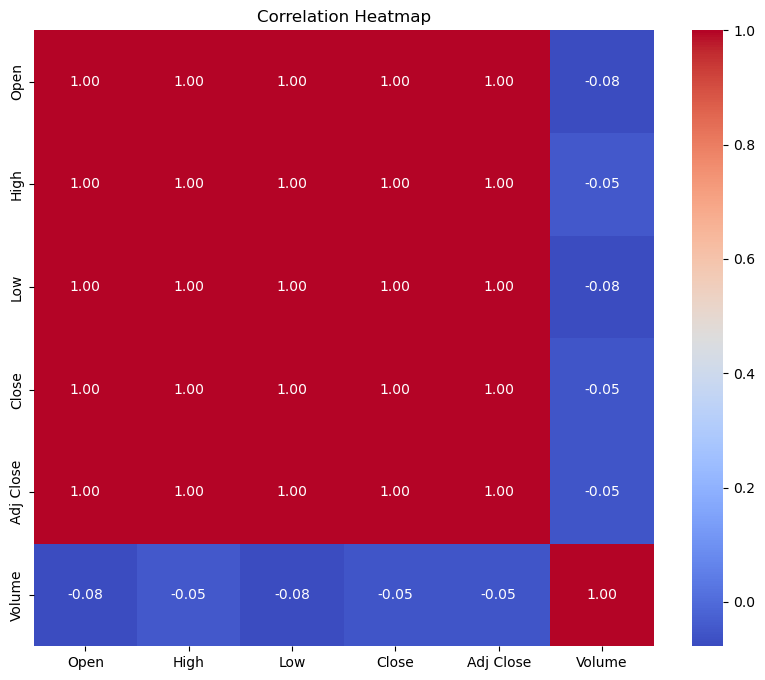

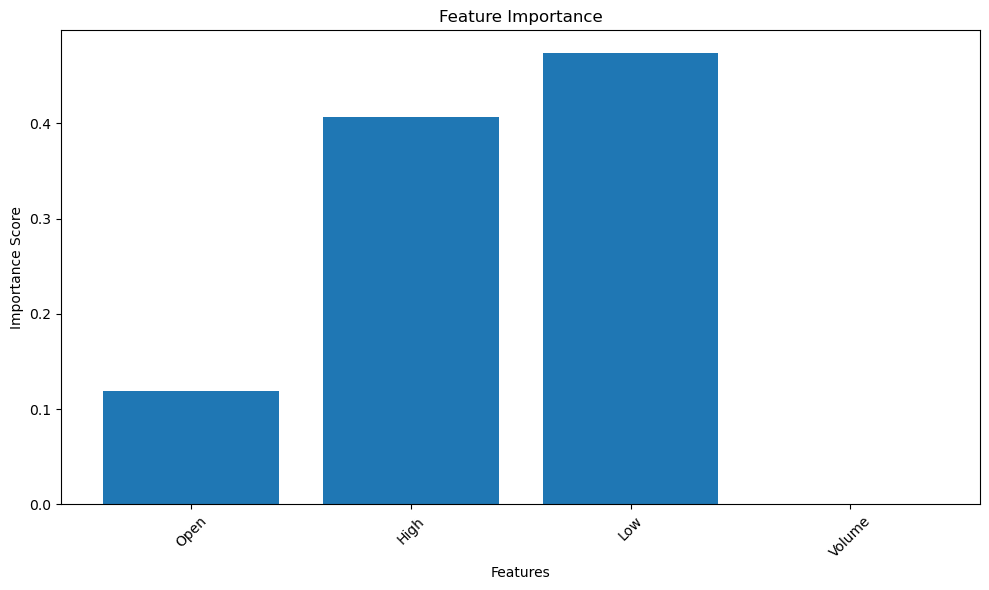

           High         Low
0     51.750000   49.599998
1     51.700001   50.650002
2     52.150002   50.900002
3     52.900002   51.549999
4     52.450001   51.299999
..          ...         ...
240  171.000000  166.399994
241  174.899994  169.050003
242  183.649994  172.199997
243  189.000000  177.199997
244  184.699997  176.000000

[245 rows x 2 columns]


In [12]:
#Zomato dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Read the CSV file
df = pd.read_csv('Datasets/ZOMATO.NS.csv')  # Replace with the path to your dataset

# Ensure that all columns used in corr() are numeric
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Select features and target variable
X = df.drop(columns=['Date', 'Close', 'Adj Close'])  # Drop irrelevant or redundant features
y = df['Close']  # Target variable

# Train Random Forest model to determine feature importance
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Plot feature importance
feature_importance = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()  # Add this line to prevent label overlap
plt.show()

# Select features based on importance score
selected_features = SelectFromModel(rf_model, threshold='median')  # Use median importance score as threshold
selected_features.fit(X, y)
X_selected = selected_features.transform(X)

# Get selected feature names
selected_feature_names = X.columns[selected_features.get_support()]

# Create DataFrame with selected features (if needed)
final_df = pd.DataFrame(data=X_selected, columns=selected_feature_names)
print(final_df)